In [1]:
import numpy as np
import pylab as plt
import modules

In [2]:
lensing_cov = modules.lensing_cov(download_dir='T17_data',output_dir='outputs',nres = 12, nsbins = 5)

In [3]:
from astropy.io import fits

def load_sources(sbin):
    fits_image_filename = 'obs_data/K1000_filt_bin'+str(sbin)+'.cat'
    hdul = fits.open(fits_image_filename)
    table = hdul[1].data
    rac = table['RAJ2000']
    dec = table['DECJ2000']
    weight = table['recal_weight_C']
    e_1 = table['autocal_e1_C']
    e_2 = table['autocal_e2_C']

    return rac,dec,e_1,e_2,weight

0
1
2
3
4
1792136.0000000002 1785987.5683105988
3681319.0000000005 3678867.903055546
6148102.0 6145378.915288727
4544395.0 4543280.582441188
5096059.0 5096058.999999999


(0.0, 2.0)

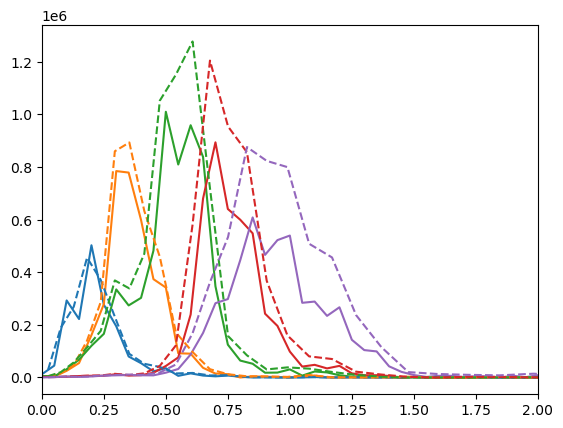

In [4]:
z_list = []
nz_list = []
for i in range(5):
    rac,dec,e_1,e_2,weight = load_sources(sbin=i+1)
    
    nz = np.loadtxt('nofz/K1000_TOMO'+str(i+1)+'_Nz.asc')

    plt.plot(nz[:60,0],nz[:60,1]*len(rac))
    
    z_list.append(nz[:,0])
    nz_list.append(nz[:,1]*len(rac))
    
lensing_cov.compute_T17_Nz(z_persbin=z_list, Nz_persbin=nz_list)

epsilon_data = []
for i in range(5):
    nz = np.loadtxt('nofz/K1000_TOMO'+str(i+1)+'_Nz.asc')
    rac,dec,e_1,e_2,weight = load_sources(sbin=i+1)

    print(np.sum(nz[:,1]*len(rac)),np.sum(lensing_cov.N_T17_persbin[i]))
    plt.plot(lensing_cov.zbins[:,1],lensing_cov.N_T17_persbin[i],c='C'+str(i),linestyle='--')
    
    

plt.xlim(0,2)

In [5]:
los = 0
lensing_cov.check_files(los=los)

all source files available
density file T17_data/allskymap_nres12r000.delta_shell.dat available


In [ ]:
lensing_cov.create_gal_positions(los = los)

 11%|█         | 4/38 [00:44<06:17, 11.09s/it]

In [ ]:
lensing_cov.combine_sourceplanes(los = los)

In [ ]:
sbin = 0
rac,dec,e_1,e_2,weight = load_sources(sbin=i+1)
epsilon_data np.array([e_1,e_2,weight]) 
    
gamma_table = lensing_cov.create_sigma_shear_catalogue(los = 0, sbin = 1, epsilon_data = epsilon_data)

In [ ]:
np.concatenate